In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("planes.csv")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0
...,...,...,...,...,...,...,...,...,...,...,...
10655,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107.0
10656,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145.0
10657,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,NaN,11:20,3h,non-stop,NaN,7229.0
10658,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648.0


# Plane csv ni ma'lumotlar tahlili

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10660 entries, 0 to 10659
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10233 non-null  object 
 1   Date_of_Journey  10338 non-null  object 
 2   Source           10473 non-null  object 
 3   Destination      10313 non-null  object 
 4   Route            10404 non-null  object 
 5   Dep_Time         10400 non-null  object 
 6   Arrival_Time     10466 non-null  object 
 7   Duration         10446 non-null  object 
 8   Total_Stops      10448 non-null  object 
 9   Additional_Info  10071 non-null  object 
 10  Price            10044 non-null  float64
dtypes: float64(1), object(10)
memory usage: 916.2+ KB


In [21]:
df.isnull().sum()

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64

In [6]:
df.describe()

,Price
count,10044.000000
mean,9044.411191
std,4472.304869
min,1759.000000
25%,5276.750000
50%,8366.000000
75%,12373.000000
max,54826.000000


In [15]:
df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

In [8]:
df.value_counts("Airline")

Airline
Jet Airways          3685
IndiGo               1981
Air India            1686
Multiple carriers    1148
SpiceJet              787
Vistara               455
Air Asia              309
GoAir                 182
Name: count, dtype: int64

# hisplot

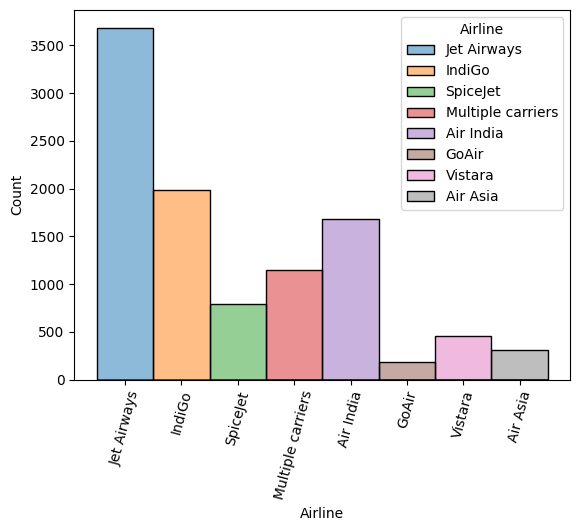

In [12]:
sns.histplot(data=df,x="Airline",hue="Airline")
plt.xticks(rotation=75)
plt.show()

In [17]:
df["Price"].min()

np.float64(1759.0)

In [18]:
df["Price"].max()

np.float64(54826.0)

# boxplotda aero komplarni korish

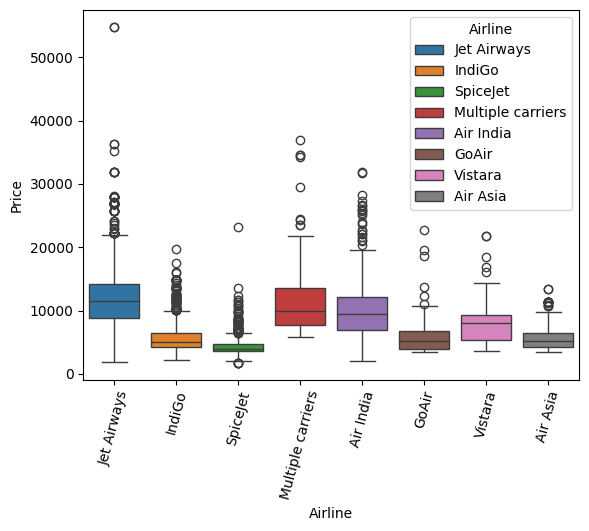

In [24]:
sns.boxplot(data=df,x="Airline",y="Price",hue="Airline")
plt.xticks(rotation=75)
plt.show()

# ma'lumotlar tahlili

In [25]:
pd.crosstab(df["Source"],df["Destination"])

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,0,0,1199,0,0,868
Chennai,0,0,0,0,364,0
Delhi,0,4318,0,0,0,0
Kolkata,2720,0,0,0,0,0
Mumbai,0,0,0,662,0,0


In [26]:
pd.crosstab(df["Source"],df["Destination"],values=df["Price"],aggfunc="median")

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,NaN,NaN,4823.0,NaN,NaN,10976.5
Chennai,NaN,NaN,NaN,NaN,3850.0,NaN
Delhi,NaN,10262.0,NaN,NaN,NaN,NaN
Kolkata,9345.0,NaN,NaN,NaN,NaN,NaN
Mumbai,NaN,NaN,NaN,3342.0,NaN,NaN


In [27]:
df["Duration"] = pd.to_timedelta(df["Duration"]).dt.total_seconds()/60
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140.0,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325.0,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285.0,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,145.0,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,930.0,1 stop,In-flight meal not included,11087.0


# heatmap

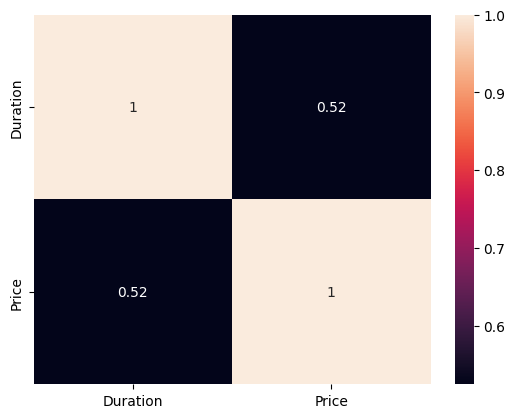

In [28]:
df1 = df[["Duration","Price"]]
sns.heatmap(df1.corr(),annot=True)
plt.show()

# NEW DATA FRAME

In [29]:
df = pd.read_csv("divorce.csv",parse_dates=["marriage_date"])
df.head()

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN


# yangi dataframe ma'lumotlarini tahlil qilish

In [30]:
df.dtypes

divorce_date                 object
dob_man                      object
education_man                object
income_man                  float64
dob_woman                    object
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   divorce_date       2209 non-null   object        
 1   dob_man            2209 non-null   object        
 2   education_man      2205 non-null   object        
 3   income_man         2209 non-null   float64       
 4   dob_woman          2209 non-null   object        
 5   education_woman    2209 non-null   object        
 6   income_woman       2209 non-null   float64       
 7   marriage_date      2209 non-null   datetime64[ns]
 8   marriage_duration  2209 non-null   float64       
 9   num_kids           1333 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 172.7+ KB


In [32]:

df.describe()

,income_man,income_woman,marriage_date,marriage_duration,num_kids
count,2209.000000,2209.000000,2209,2209.000000,1333.000000
mean,7922.986410,6793.164545,1996-12-28 17:23:00.353101056,9.606609,1.672918
min,3.000000,3.500000,1970-01-15 00:00:00,1.000000,1.000000
25%,3600.000000,3000.000000,1991-05-25 00:00:00,4.000000,1.000000
50%,6000.000000,5000.000000,1997-11-12 00:00:00,8.000000,2.000000
75%,10000.000000,8000.000000,2003-04-04 00:00:00,14.000000,2.000000
max,80000.000000,90000.000000,2014-02-14 00:00:00,32.000000,5.000000
std,7693.796497,6562.928689,NaN,7.266696,0.732858


In [33]:
df = pd.read_csv("divorce.csv",parse_dates=["marriage_date"])
df.dtypes

divorce_date                 object
dob_man                      object
education_man                object
income_man                  float64
dob_woman                    object
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object

In [34]:
df["marriage_data"] = pd.to_datetime(df["marriage_date"])
df.dtypes

divorce_date                 object
dob_man                      object
education_man                object
income_man                  float64
dob_woman                    object
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
marriage_data        datetime64[ns]
dtype: object

In [35]:
df["marriage_month"] = df["marriage_date"].dt.month
df.head()

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids,marriage_data,marriage_month
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0,2000-06-26,6
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN,2001-09-02,9
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0,2000-02-02,2
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN,2006-05-13,5
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN,2007-08-06,8


# Lineplot

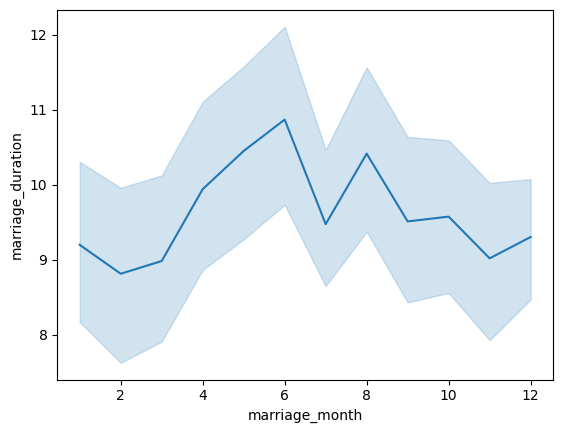

In [36]:
sns.lineplot(data=df ,x="marriage_month", y="marriage_duration")
plt.show()

In [37]:
df.corr(numeric_only=True)

,income_man,income_woman,marriage_duration,num_kids,marriage_month
income_man,1.000000,0.318047,0.085321,0.040848,0.013652
income_woman,0.318047,1.000000,0.078677,-0.018015,0.041441
marriage_duration,0.085321,0.078677,1.000000,0.447358,0.001433
num_kids,0.040848,-0.018015,0.447358,1.000000,-0.000551
marriage_month,0.013652,0.041441,0.001433,-0.000551,1.000000


# heatmap orqali malumotlarni ko'rish

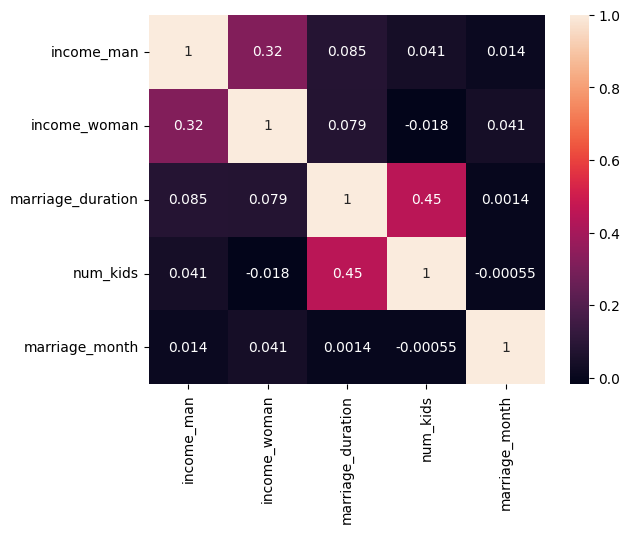

In [38]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

# scatterplot

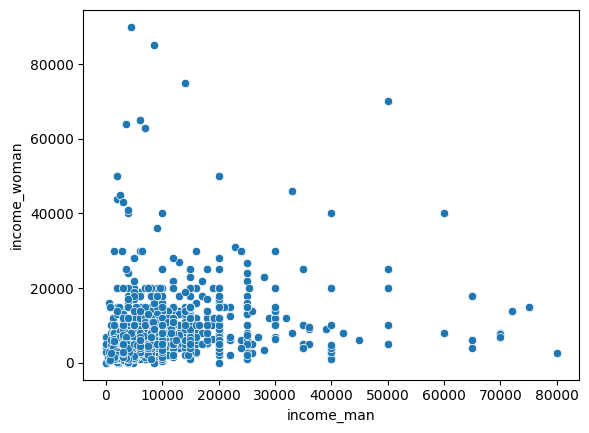

In [39]:
sns.scatterplot(data=df,x="income_man",y="income_woman")
plt.show()

# pairplotda ishlash

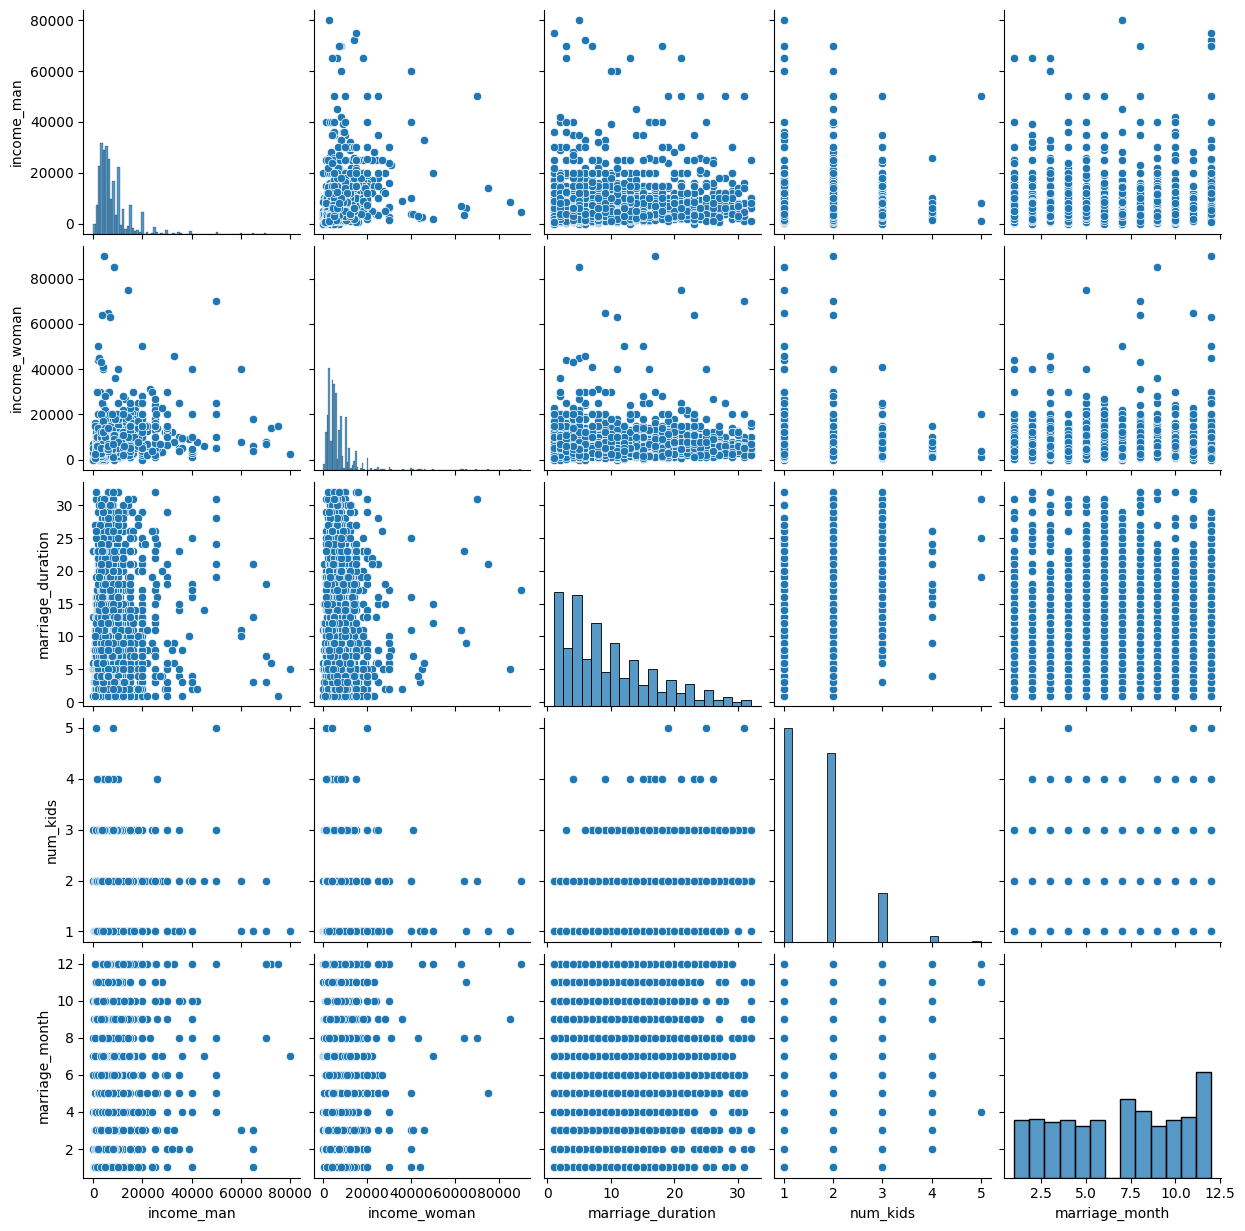

In [40]:
sns.pairplot(data=df)
plt.show()